# Importing Dependecies

In [1]:
import os
import cv2
import torch
import torchvision
from ultralytics import YOLO

In [2]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA version:", torch.version.cuda)

PyTorch version: 2.3.1+cu121
Torchvision version: 0.18.1+cu121
CUDA version: 12.1


In [3]:
root_dir = 'kaggle/input/football_players_detection'
test_dir = 'kaggle/input/football_players_detection/test/images'

# Training The model

In [4]:
model = YOLO('yolov8n.pt')

In [5]:
# Calculate the size of the model
model_size = sum(torch.numel(param) for param in model.parameters())
print("The model has", model_size, "parameters")
file_size = os.path.getsize('yolov8n.pt') / (1024 * 1024)  # size in MB
print(f"File size: {file_size} MB")

The model has 3157200 parameters
File size: 6.246372222900391 MB


In [6]:
# Check if CUDA is available
if torch.cuda.is_available():
    model = model.to('cuda')
    print("Model has been moved to GPU.")
else:
    print("CUDA is not available; model is running on CPU.")

Model has been moved to GPU.


In [7]:
device = next(model.parameters()).device
print(f"The model is running on: {device}")

The model is running on: cuda:0


In [8]:
model.train(data = 'kaggle/input/football_players_detection/data.yaml', epochs = 20)

engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=kaggle/input/football_players_detection/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False

train: Scanning C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\train\labels.cache... 10308 images, 623 backgrounds, 0 corrupt: 100%|██████████| 10308/10308 [00:00<?, ?it/s]
val: Scanning C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\valid\labels.cache... 972 images, 30 backgrounds, 0 corrupt: 100%|██████████| 972/972 [00:00<?, ?it/s]


Plotting labels to C:\Users\awsom\YOLOsoccer\runs\detect\train16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\awsom\YOLOsoccer\runs\detect\train16
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.33G      1.431      1.288      1.107          9        640: 100%|██████████| 645/645 [02:46<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.67it/s]


                   all        972       5407      0.825      0.605      0.662      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.37G      1.402     0.9437      1.112         17        640: 100%|██████████| 645/645 [02:26<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.94it/s]

                   all        972       5407      0.919      0.601       0.69      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.5G      1.385     0.8882      1.109          9        640: 100%|██████████| 645/645 [02:17<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.90it/s]

                   all        972       5407      0.824      0.643      0.698      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G      1.354     0.8419      1.095         51        640: 100%|██████████| 645/645 [02:16<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.89it/s]


                   all        972       5407      0.822      0.646      0.701      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.5G      1.332      0.812      1.087         20        640: 100%|██████████| 645/645 [02:16<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.85it/s]

                   all        972       5407       0.88      0.662      0.736      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.38G      1.301     0.7749      1.071         23        640: 100%|██████████| 645/645 [02:17<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.76it/s]


                   all        972       5407      0.873      0.668      0.744      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.4G      1.278     0.7526      1.064         23        640: 100%|██████████| 645/645 [02:18<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.92it/s]


                   all        972       5407      0.861      0.694      0.759      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.51G      1.264     0.7392      1.056         41        640: 100%|██████████| 645/645 [02:17<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.92it/s]


                   all        972       5407      0.829      0.699      0.753      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.37G      1.242     0.7176      1.049         25        640: 100%|██████████| 645/645 [02:16<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.93it/s]


                   all        972       5407      0.858      0.707      0.772      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.37G      1.222      0.698      1.043         17        640: 100%|██████████| 645/645 [02:16<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.94it/s]

                   all        972       5407      0.854      0.704      0.764      0.457


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.42G      1.195       0.65      1.047         12        640: 100%|██████████| 645/645 [02:13<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.86it/s]

                   all        972       5407      0.875      0.689      0.769       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.38G      1.172     0.6294       1.04         17        640: 100%|██████████| 645/645 [02:13<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.98it/s]

                   all        972       5407      0.883      0.682      0.773      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G      1.152     0.6151      1.029         14        640: 100%|██████████| 645/645 [02:12<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.97it/s]

                   all        972       5407        0.9      0.704      0.792      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.38G      1.137     0.6025      1.023          8        640: 100%|██████████| 645/645 [02:15<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.46it/s]

                   all        972       5407      0.902      0.713      0.804      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.41G      1.114     0.5818      1.017         10        640: 100%|██████████| 645/645 [02:17<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.90it/s]

                   all        972       5407      0.898      0.711      0.803      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.4G      1.103     0.5737      1.009         21        640: 100%|██████████| 645/645 [02:13<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.76it/s]

                   all        972       5407      0.857      0.738        0.8      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.4G      1.087     0.5594      1.003          7        640: 100%|██████████| 645/645 [02:27<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.82it/s]

                   all        972       5407      0.882      0.733       0.82      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.38G      1.068     0.5468     0.9991         13        640: 100%|██████████| 645/645 [02:20<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.66it/s]

                   all        972       5407      0.904      0.731      0.822      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.38G      1.051      0.537     0.9909         10        640: 100%|██████████| 645/645 [02:25<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]

                   all        972       5407      0.937      0.729      0.829      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.37G      1.033     0.5253     0.9875         13        640: 100%|██████████| 645/645 [02:29<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.46it/s]

                   all        972       5407      0.873      0.773      0.835      0.527



20 epochs completed in 0.858 hours.
Optimizer stripped from C:\Users\awsom\YOLOsoccer\runs\detect\train16\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\awsom\YOLOsoccer\runs\detect\train16\weights\best.pt, 6.2MB

Validating C:\Users\awsom\YOLOsoccer\runs\detect\train16\weights\best.pt...
Ultralytics YOLOv8.2.64  Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:14<00:00,  2.12it/s]


                   all        972       5407      0.872      0.773      0.835      0.528
              football        241        275      0.806      0.618      0.715      0.371
                player        936       5132      0.938      0.927      0.955      0.684
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to C:\Users\awsom\YOLOsoccer\runs\detect\train16


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B11953E480>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

# Visualization of Testing

In [30]:
%matplotlib inline

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def detection_pipeline(images):
    output = model(images)
    
    # Visualize the results
    for i, r in enumerate(output):
        
        original_img = images[i]
        print("before: \n")

        plt.axis('off')
        plt.imshow(Image.open(original_img))
        plt.show()

        print("after: \n")
        
        # Plot results image
        im_bgr = r.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

        plt.axis('off')
        plt.imshow(im_rgb)
        plt.show()

In [3]:
test_imgs = [
    "kaggle/input/football_players_detection/test/images/102_pp_jpg.rf.04ca2f20dbf39c3be706d2f14c45bc31.jpg",
    "kaggle/input/football_players_detection/test/images/155_pp_jpg.rf.2db03a69f981d7cb58409ef03a746601.jpg",
    "kaggle/input/football_players_detection/test/images/181_pp_jpg.rf.87756723985edacdacbaec82857a48f0.jpg",
    "kaggle/input/football_players_detection/test/images/176_pp_jpg.rf.b275b7a45cbfc23a87c39b3e89c512fb.jpg",
    "kaggle/input/football_players_detection/test/images/159_pp_jpg.rf.79c031db46842bc50947d9bc52c4ecff.jpg",
]

In [4]:
import matplotlib.pyplot as plt
detection_pipeline(test_imgs)

NameError: name 'model' is not defined

In [5]:
!yolo task=detect mode=predict model =runs/detect/train16/weights/best.pt conf=0.25 source=kaggle/input/football_players_detection/test/images

Ultralytics YOLOv8.2.64 ðŸš€ Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/520 C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\test\images\102_pp_jpg.rf.04ca2f20dbf39c3be706d2f14c45bc31.jpg: 640x640 1 football, 4 players, 15.0ms
image 2/520 C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\test\images\102_pp_jpg.rf.0ffb40112e9b898eb311651f97b1cf6a.jpg: 640x640 4 players, 14.4ms
image 3/520 C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\test\images\102_pp_jpg.rf.7c841f548216975cab8b16676ff2810e.jpg: 640x640 7 players, 15.0ms
image 4/520 C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\test\images\102_pp_jpg.rf.7dd2b04546f77f2321ef7c67d7e109d2.jpg: 640x640 1 football, 14 players, 14.5ms
image 5/520 C:\Users\awsom\YOLOsoccer\kaggle\input\football_players_detection\test\images\105_pp_jpg.rf.191815498deea9

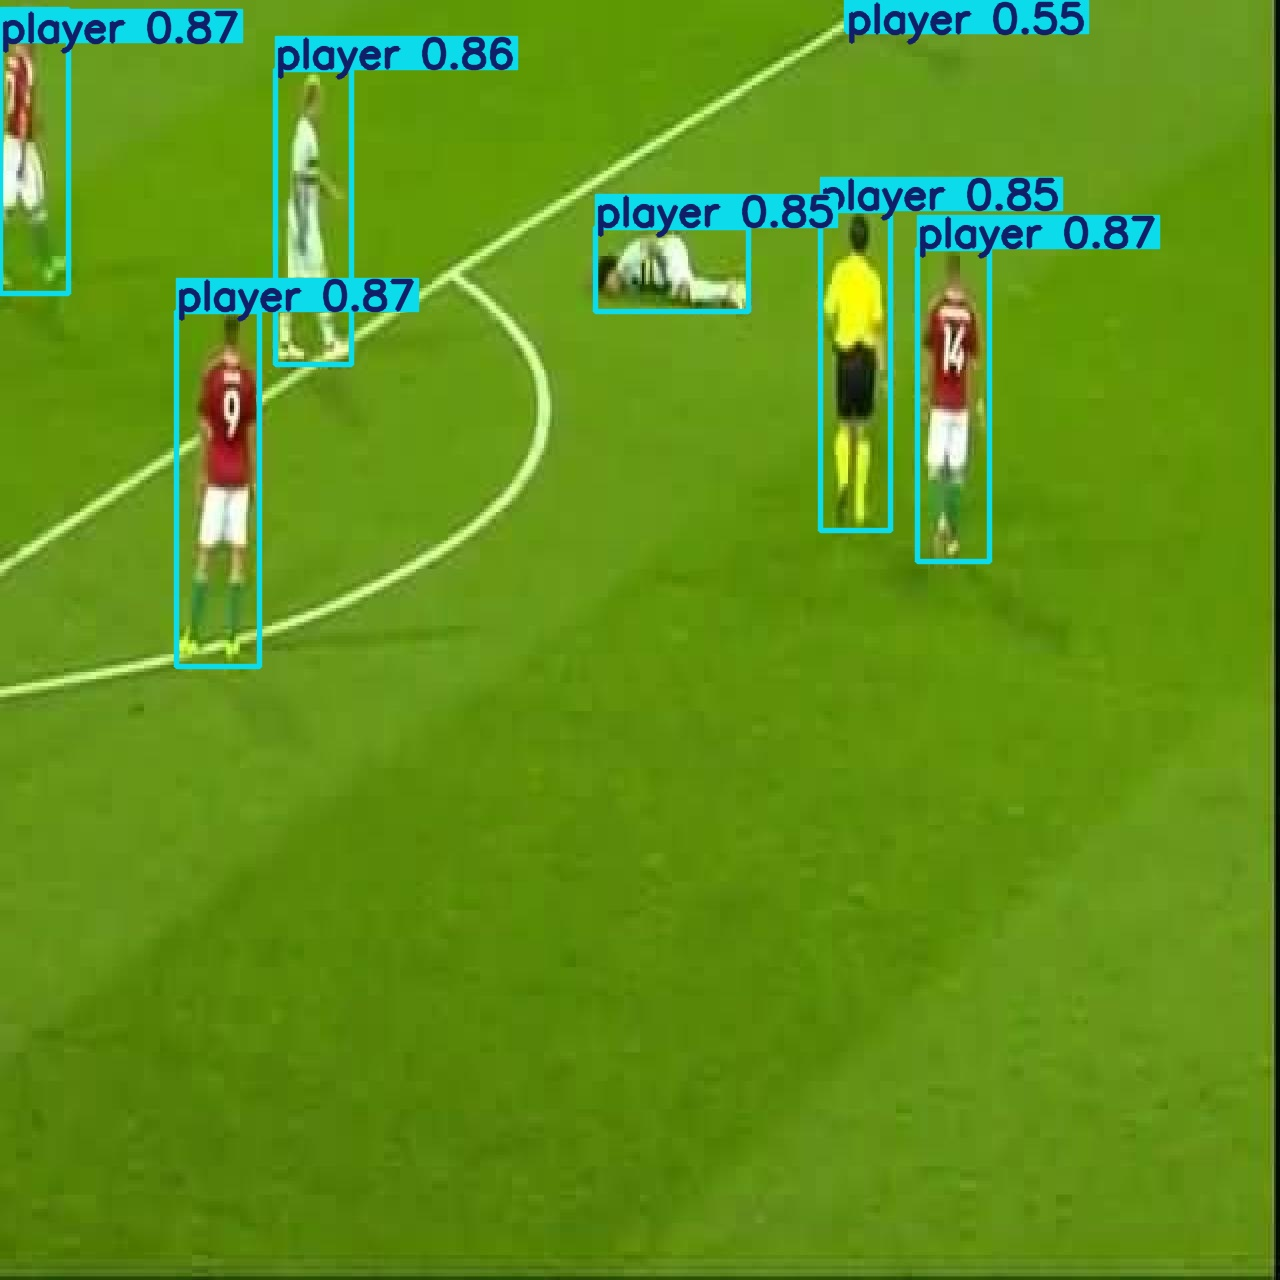

In [6]:
from IPython.display import display, Image
Image('runs/detect/predict/5678_jpg.rf.c6a23d19614c2ad569146bac674a2310.jpg',height = 400)

In [42]:
!yolo track model="runs/detect/train16/weights/best.pt" source="kaggle/video.mp4" show=True

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...




   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.5 MB 6.9 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.5 MB 8.8 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.4 MB/s eta 0:00:00




requirements: AutoUpdate success âœ… 5.3s, installed 1 package: ['lapx>=0.5.2']
requirements: âš ï¸� Restart runtime or rerun command for updates to take effect

Ultralytics YOLOv8.2.64 ðŸš€ Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/449) C:\Users\awsom\YOLOsoccer\kaggle\video.mp4: 384x640 14 players, 75.2ms
video 1/1 (frame 2/449) C:\Users\awsom\YOLOsoccer\kaggle\video.mp4: 384x640 14 players,

[aac @ 00000222af2ab500] Input buffer exhausted before END element found


In [8]:
!ffmpeg -i runs/detect/track/video.avi -vf fps=15 -s 640x480 -vcodec libx264 output.mp4

ffmpeg version 7.0.1-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-li

In [9]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [10]:
from IPython.display import HTML, display
html_video = HTML("""
<video controls>
      <source src="%s" type="video/mp4">
      Your browser does not support the video tag.
</video>
""" % data_url)

display(html_video)